In [11]:
from pennylane import numpy as np
import pennylane as qml 
from Z2 import * 

In [10]:
N = 5
p = 4

# variational circuit for state 
def circuit(param, # p X (N+N) thetas and phis  
            w #wires list 
            ):
    (p, _)  = param.shape
    N = len(w)
    # prepare |+> state with Hadamard gate 
    for i in range(N):
        qml.Hadamard(wires = w[i])
    # parametrized circuit with depth p 
    for step in range(p):
        for i in range(N):
            qml.RX(param[step, i], wires = w[i]) # exp(-i X phi/2)
        for i in range(N-1):
            qml.CNOT(wires = w[i: i+2])
            qml.RZ(param[step, i], wires = w[i+1])
            qml.CNOT(wires = w[i: i+2])
        qml.CNOT(wires = [w[N-1], w[0]])
        qml.RZ(param[step, N-1], wires = w[N-1])
        qml.CNOT(wires = [w[N-1], w[0]])

H = generate_Hamiltonian(N)
    
energy_list, param = find_groundstate(N, p, circuit, H)


  (-1.0) [Z0 Z1]
+ (-1.0) [Z1 Z2]
+ (-1.0) [Z2 Z3]
+ (-1.0) [Z3 Z4]
+ (-1.0) [Z4 Z0]


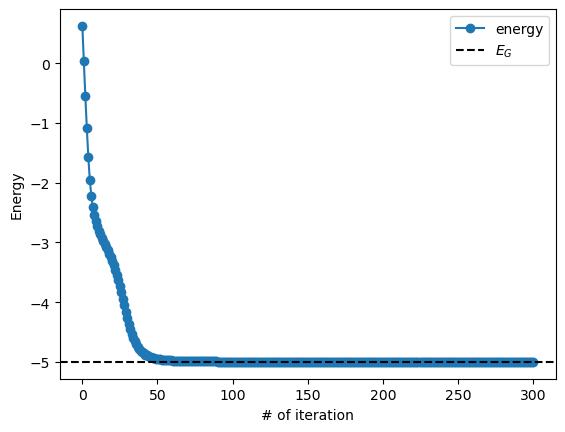

In [15]:
import matplotlib.pyplot as plt 
plt.plot(energy_list, '-o', label = 'energy')
plt.axhline(y =-N, c = 'k', linestyle = '--', label = '$E_G$')
plt.xlabel('# of iteration')
plt.ylabel('Energy')
plt.legend()
